<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/3DCharts_Toy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

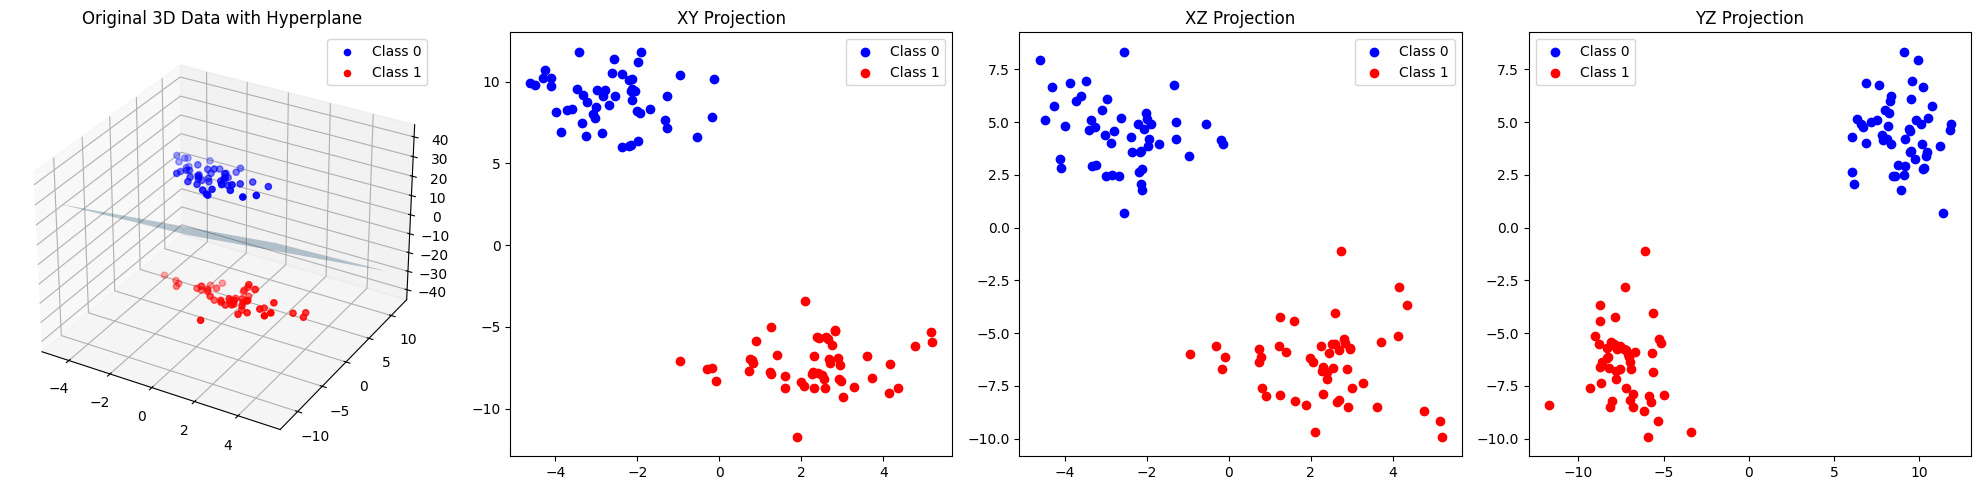


Hyperplane equation: 0.05x + -0.13y + -0.05z + 0.01 = 0
Support vectors: 3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

# Generate 3D sample data
np.random.seed(42)
X, y = make_blobs(n_samples=100, n_features=3, centers=2, cluster_std=1.5, random_state=42)

# Fit SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Create figure with subplots
fig = plt.figure(figsize=(20, 5))

# 1. Original 3D Plot
ax1 = fig.add_subplot(141, projection='3d')
ax1.scatter(X[y==0,0], X[y==0,1], X[y==0,2], color='blue', label='Class 0')
ax1.scatter(X[y==1,0], X[y==1,1], X[y==1,2], color='red', label='Class 1')

# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]

# Create a grid to visualize the hyperplane
xx1, xx2 = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 10),
                       np.linspace(X[:,1].min(), X[:,1].max(), 10))
xx3 = (-w[0] * xx1 - w[1] * xx2 - b) / w[2]

# Plot the hyperplane
ax1.plot_surface(xx1, xx2, xx3, alpha=0.3)
ax1.set_title('Original 3D Data with Hyperplane')
ax1.legend()

# 2. Projection onto XY plane
ax2 = fig.add_subplot(142)
ax2.scatter(X[y==0,0], X[y==0,1], color='blue', label='Class 0')
ax2.scatter(X[y==1,0], X[y==1,1], color='red', label='Class 1')
ax2.set_title('XY Projection')
ax2.legend()

# 3. Projection onto XZ plane
ax3 = fig.add_subplot(143)
ax3.scatter(X[y==0,0], X[y==0,2], color='blue', label='Class 0')
ax3.scatter(X[y==1,0], X[y==1,2], color='red', label='Class 1')
ax3.set_title('XZ Projection')
ax3.legend()

# 4. Projection onto YZ plane
ax4 = fig.add_subplot(144)
ax4.scatter(X[y==0,1], X[y==0,2], color='blue', label='Class 0')
ax4.scatter(X[y==1,1], X[y==1,2], color='red', label='Class 1')
ax4.set_title('YZ Projection')
ax4.legend()

plt.tight_layout()
plt.show()

# Print some information about the hyperplane
print("\nHyperplane equation: {:.2f}x + {:.2f}y + {:.2f}z + {:.2f} = 0".format(w[0], w[1], w[2], b))
print("Support vectors:", len(clf.support_vectors_))

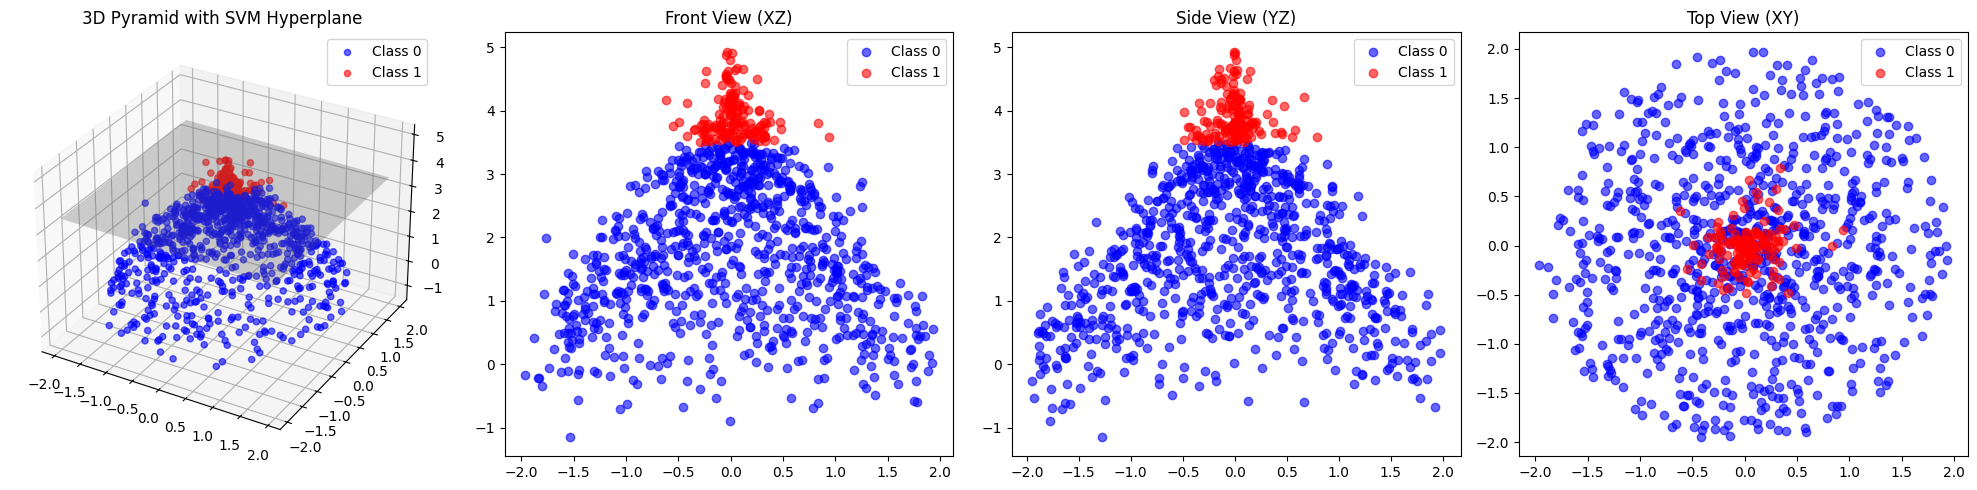


Hyperplane equation in original coordinates:
0.12x + -0.08y + 8.70z + 3.30 = 0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate pyramid-like data
def generate_pyramid_data(n_samples=1000):
    # Generate points in a circle for the base
    radius = np.random.uniform(0, 2, n_samples)
    theta = np.random.uniform(0, 2*np.pi, n_samples)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    # Generate height (z) based on radius to create pyramid shape
    # Add some noise for rounded bottom effect
    z = 4 - 2*radius + np.random.normal(0, 0.5, n_samples)

    # Combine coordinates
    points = np.column_stack((x, y, z))

    # Create labels: points above certain height are class 1
    labels = (z > 3.5).astype(int)

    return points, labels

# Generate data
X, y = generate_pyramid_data()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit SVM
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_scaled, y)

# Create figure with subplots for different views
fig = plt.figure(figsize=(20, 5))

# 1. Original 3D Plot
ax1 = fig.add_subplot(141, projection='3d')
scatter1 = ax1.scatter(X[y==0,0], X[y==0,1], X[y==0,2],
                      c='blue', alpha=0.6, label='Class 0')
scatter2 = ax1.scatter(X[y==1,0], X[y==1,1], X[y==1,2],
                      c='red', alpha=0.6, label='Class 1')

# Get the hyperplane
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

# Create grid for hyperplane
xx1, xx2 = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 10),
                       np.linspace(X[:,1].min(), X[:,1].max(), 10))

# Scale grid points
grid_points = np.column_stack((xx1.ravel(), xx2.ravel(),
                              np.zeros_like(xx1.ravel())))
grid_points_scaled = scaler.transform(grid_points)

# Calculate z coordinate of hyperplane
xx3_scaled = (-w[0] * grid_points_scaled[:,0]
              - w[1] * grid_points_scaled[:,1] - b) / w[2]
xx3 = scaler.inverse_transform(
    np.column_stack((grid_points_scaled[:,:2], xx3_scaled)))[:,2]
xx3 = xx3.reshape(xx1.shape)

# Plot hyperplane
surf = ax1.plot_surface(xx1, xx2, xx3, alpha=0.3, color='gray')

ax1.set_title('3D Pyramid with SVM Hyperplane')
ax1.legend()

# 2. Front view (XZ projection)
ax2 = fig.add_subplot(142)
ax2.scatter(X[y==0,0], X[y==0,2], c='blue', alpha=0.6, label='Class 0')
ax2.scatter(X[y==1,0], X[y==1,2], c='red', alpha=0.6, label='Class 1')
ax2.set_title('Front View (XZ)')
ax2.legend()

# 3. Side view (YZ projection)
ax3 = fig.add_subplot(143)
ax3.scatter(X[y==0,1], X[y==0,2], c='blue', alpha=0.6, label='Class 0')
ax3.scatter(X[y==1,1], X[y==1,2], c='red', alpha=0.6, label='Class 1')
ax3.set_title('Side View (YZ)')
ax3.legend()

# 4. Top view (XY projection)
ax4 = fig.add_subplot(144)
ax4.scatter(X[y==0,0], X[y==0,1], c='blue', alpha=0.6, label='Class 0')
ax4.scatter(X[y==1,0], X[y==1,1], c='red', alpha=0.6, label='Class 1')
ax4.set_title('Top View (XY)')
ax4.legend()

plt.tight_layout()
plt.show()

# Print hyperplane equation
w_original = scaler.scale_ * w
b_original = b + np.sum(w * scaler.mean_ / scaler.scale_)
print("\nHyperplane equation in original coordinates:")
print(f"{w_original[0]:.2f}x + {w_original[1]:.2f}y + {w_original[2]:.2f}z + {b_original:.2f} = 0")

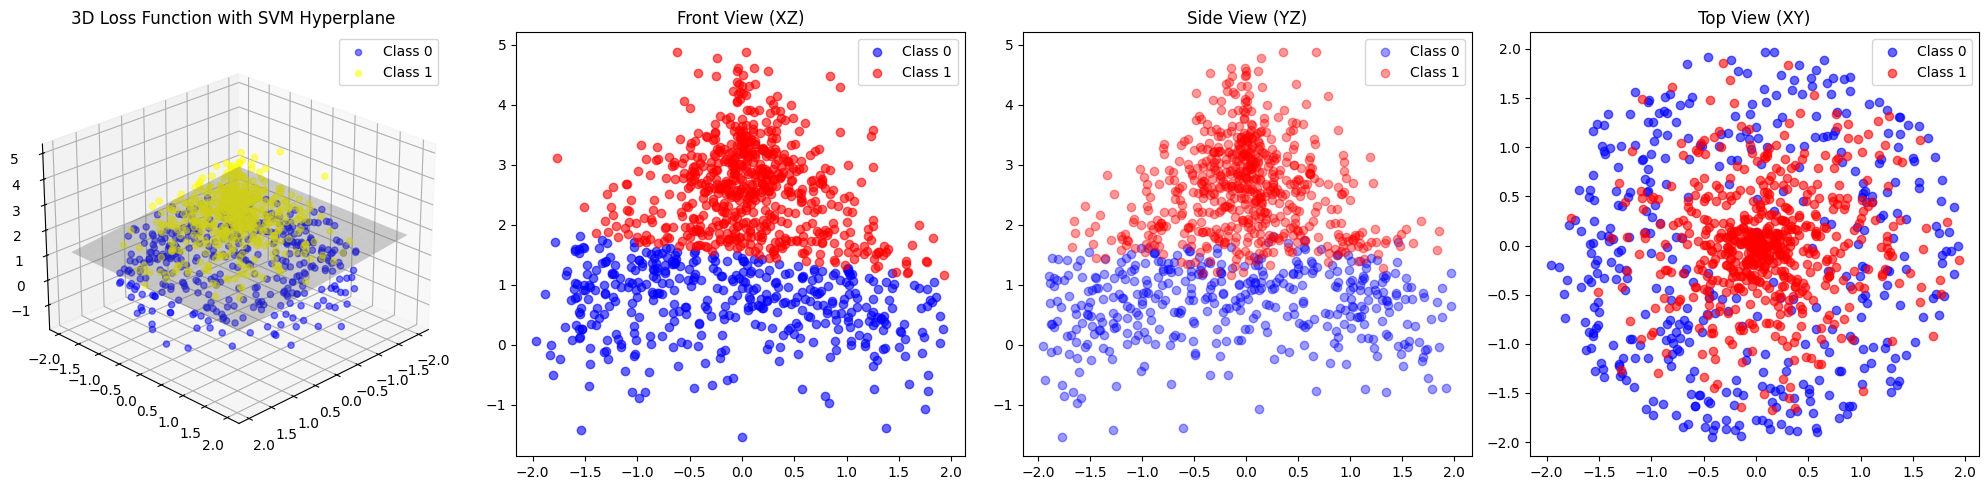


Hyperplane equation in original coordinates:
0.75x + 0.08y + 8.38z + 13.26 = 0


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate inverted pyramid-like data with more rounding
def generate_rounded_loss_data(n_samples=1000):
    # Generate points in a circle for the distribution
    radius = np.random.uniform(0, 2, n_samples)
    theta = np.random.uniform(0, 2*np.pi, n_samples)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    # Generate height (z) based on radius to create rounded loss function shape
    # Using exponential function for more pronounced rounding
    z = 3 * np.exp(-0.5 * (radius**2)) + np.random.normal(0, 0.8, n_samples)

    # Combine coordinates
    points = np.column_stack((x, y, z))

    # Create labels: points above certain height are class 1
    # Adding slight angle by incorporating x coordinate
    labels = (z + 0.2*x > 1.5).astype(int)

    return points, labels

# Generate data
X, y = generate_rounded_loss_data()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit SVM with custom parameters for angled hyperplane
svm_clf = SVC(kernel='linear', class_weight={0: 1, 1: 1.2})
svm_clf.fit(X_scaled, y)

# Create figure with subplots for different views
fig = plt.figure(figsize=(20, 5))

# 1. Original 3D Plot
ax1 = fig.add_subplot(141, projection='3d')
scatter1 = ax1.scatter(X[y==0,0], X[y==0,1], X[y==0,2],
                      c='blue', alpha=0.5, label='Class 0')
scatter2 = ax1.scatter(X[y==1,0], X[y==1,1], X[y==1,2],
                      c='yellow', alpha=0.5, label='Class 1')
#scatter2 = ax1.scatter(X[y==1,0], X[y==1,1], X[y==1,2],
#                      cmap='inferno', alpha=0.5, label='Class 1')
# Get the hyperplane
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

# Create grid for hyperplane
xx1, xx2 = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 20),
                       np.linspace(X[:,1].min(), X[:,1].max(), 20))

# Scale grid points
grid_points = np.column_stack((xx1.ravel(), xx2.ravel(),
                              np.zeros_like(xx1.ravel())))
grid_points_scaled = scaler.transform(grid_points)

# Calculate z coordinate of hyperplane
xx3_scaled = (-w[0] * grid_points_scaled[:,0]
              - w[1] * grid_points_scaled[:,1] - b) / w[2]
xx3 = scaler.inverse_transform(
    np.column_stack((grid_points_scaled[:,:2], xx3_scaled)))[:,2]
xx3 = xx3.reshape(xx1.shape)

# Plot hyperplane
surf = ax1.plot_surface(xx1, xx2, xx3, alpha=0.3, color='gray')

# Adjust viewing angle for better visualization
ax1.view_init(elev=25, azim=45)
ax1.set_title('3D Loss Function with SVM Hyperplane')
ax1.legend()

# 2. Front view (XZ projection)
ax2 = fig.add_subplot(142)
ax2.scatter(X[y==0,0], X[y==0,2], c='blue', alpha=0.6, label='Class 0')
ax2.scatter(X[y==1,0], X[y==1,2], c='red', alpha=0.6, label='Class 1')
ax2.set_title('Front View (XZ)')
ax2.legend()

# 3. Side view (YZ projection)
ax3 = fig.add_subplot(143)
ax3.scatter(X[y==0,1], X[y==0,2], c='blue', alpha=0.4, label='Class 0')
ax3.scatter(X[y==1,1], X[y==1,2], c='red', alpha=0.4, label='Class 1')
ax3.set_title('Side View (YZ)')
ax3.legend()

# 4. Top view (XY projection)
ax4 = fig.add_subplot(144)
ax4.scatter(X[y==0,0], X[y==0,1], c='blue', alpha=0.6, label='Class 0')
ax4.scatter(X[y==1,0], X[y==1,1], c='red', alpha=0.6, label='Class 1')
ax4.set_title('Top View (XY)')
ax4.legend()

plt.tight_layout()
plt.show()

# Print hyperplane equation
w_original = scaler.scale_ * w
b_original = b + np.sum(w * scaler.mean_ / scaler.scale_)
print("\nHyperplane equation in original coordinates:")
print(f"{w_original[0]:.2f}x + {w_original[1]:.2f}y + {w_original[2]:.2f}z + {b_original:.2f} = 0")

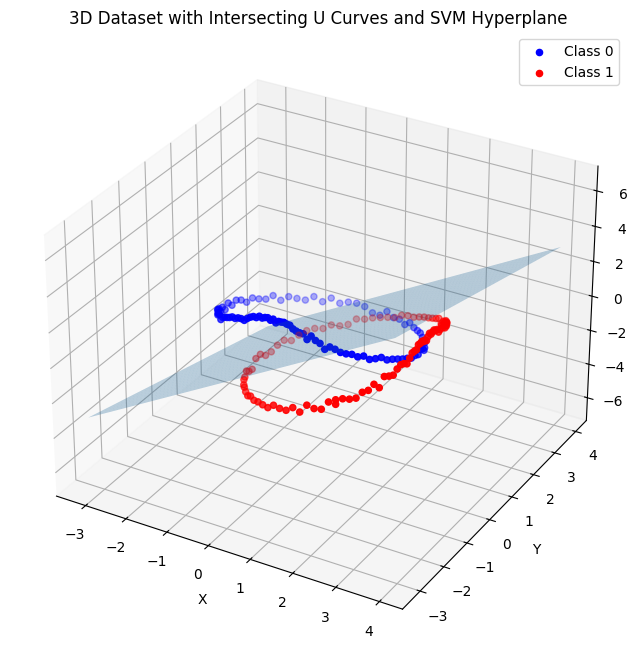

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

# Generate data for the first "U" curve
n_samples = 100
theta1 = np.linspace(-np.pi, np.pi, n_samples)
radius1 = 2 + np.sin(theta1)
x1 = radius1 * np.cos(theta1)
y1 = radius1 * np.sin(theta1)
z1 = 4 - 2 * radius1 + np.random.normal(0, 0.1, n_samples)  # Noise for realism

# Generate data for the second "U" curve (rotated and shifted)
theta2 = np.linspace(-np.pi, np.pi, n_samples)
radius2 = 2 + np.sin(theta2)
x2 = radius2 * np.cos(theta2 + np.pi/2) + 2  # Rotated and shifted
y2 = radius2 * np.sin(theta2 + np.pi/2)
z2 = 4 - 2 * radius2 + np.random.normal(0, 0.1, n_samples)  # Noise

# Combine the data and create labels
X = np.vstack((np.c_[x1, y1, z1], np.c_[x2, y2, z2]))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Fit SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Create a meshgrid for visualizing the hyperplane
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 50),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 50))
zz = (-clf.intercept_[0] - clf.coef_[0][0] * xx - clf.coef_[0][1] * yy) / clf.coef_[0][2]

# Plot the data and the hyperplane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], c='blue', label='Class 0')
ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], c='red', label='Class 1')
ax.plot_surface(xx, yy, zz, alpha=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Dataset with Intersecting U Curves and SVM Hyperplane')
ax.legend()
plt.show()

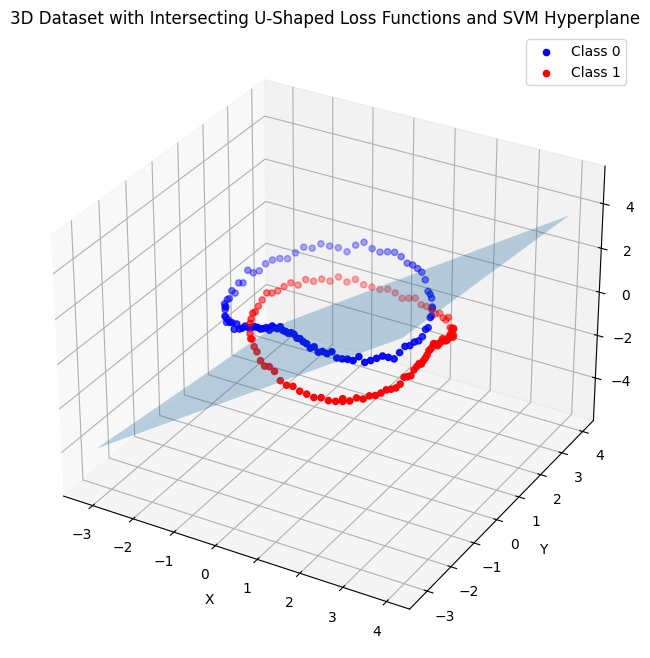

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

# Generate data for the first "U" curve (loss function shape)
n_samples = 100
theta1 = np.linspace(-np.pi, np.pi, n_samples)
radius1 = 2 + np.sin(theta1)
x1 = radius1 * np.cos(theta1)
y1 = radius1 * np.sin(theta1)
z1 = (radius1 - 2)**2 + np.random.normal(0, 0.1, n_samples)  # U-shaped loss function

# Generate data for the second "U" curve (rotated, shifted, loss function shape)
theta2 = np.linspace(-np.pi, np.pi, n_samples)
radius2 = 2 + np.sin(theta2)
x2 = radius2 * np.cos(theta2 + np.pi/2) + 2  # Rotated and shifted
y2 = radius2 * np.sin(theta2 + np.pi/2)
z2 = (radius2 - 2)**2 + np.random.normal(0, 0.1, n_samples)  # U-shaped loss function

# Combine the data and create labels
X = np.vstack((np.c_[x1, y1, z1], np.c_[x2, y2, z2]))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Fit SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Create a meshgrid for visualizing the hyperplane
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 50),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 50))
zz = (-clf.intercept_[0] - clf.coef_[0][0] * xx - clf.coef_[0][1] * yy) / clf.coef_[0][2]

# Plot the data and the hyperplane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], c='blue', label='Class 0')
ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], c='red', label='Class 1')
ax.plot_surface(xx, yy, zz, alpha=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Dataset with Intersecting U-Shaped Loss Functions and SVM Hyperplane')
ax.legend()
plt.show()

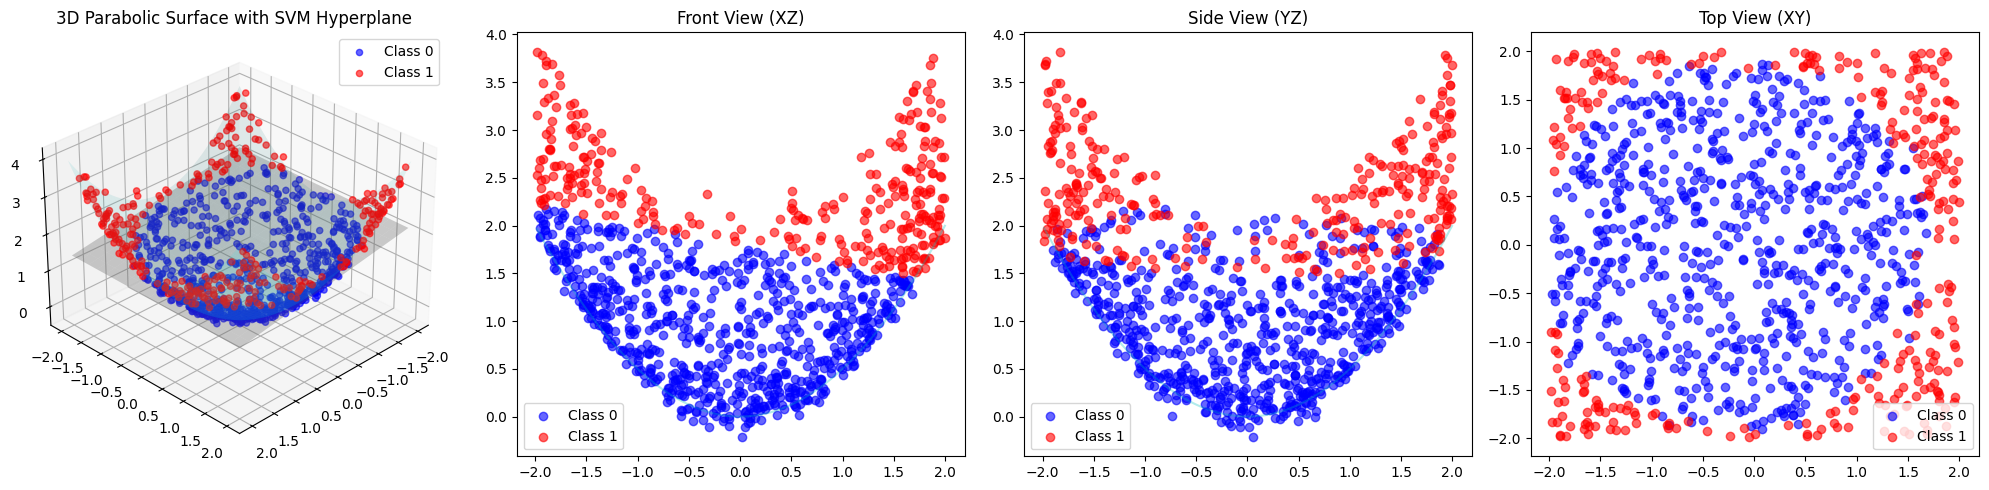


Parabola equation: z = 0.5(x² + y²)

Hyperplane equation in original coordinates:
2.28x + 0.16y + 6.01z + 7.53 = 0


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate parabolic data
def generate_parabolic_data(n_samples=1000):
    # Generate x and y coordinates in a grid-like pattern
    x = np.random.uniform(-2, 2, n_samples)
    y = np.random.uniform(-2, 2, n_samples)

    # Create parabolic z coordinate
    z = 0.5 * (x**2 + y**2) + np.random.normal(0, 0.1, n_samples)

    # Combine coordinates
    points = np.column_stack((x, y, z))

    # Create labels: points above parabolic boundary
    # Adding slight tilt for angled hyperplane
    labels = (z + 0.2*x > 1.8).astype(int)

    return points, labels

# Generate data
X, y = generate_parabolic_data()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit SVM with custom parameters for angled hyperplane
svm_clf = SVC(kernel='linear', class_weight={0: 1, 1: 1.2})
svm_clf.fit(X_scaled, y)

# Create figure with subplots
fig = plt.figure(figsize=(20, 5))

# 1. Original 3D Plot with parabolic surface
ax1 = fig.add_subplot(141, projection='3d')

# Create a smooth parabolic surface for visualization
x_surf = np.linspace(X[:,0].min(), X[:,0].max(), 50)
y_surf = np.linspace(X[:,1].min(), X[:,1].max(), 50)
xx_surf, yy_surf = np.meshgrid(x_surf, y_surf)
zz_surf = 0.5 * (xx_surf**2 + yy_surf**2)

# Plot the smooth parabolic surface
ax1.plot_surface(xx_surf, yy_surf, zz_surf, alpha=0.1, color='cyan')

# Plot data points
scatter1 = ax1.scatter(X[y==0,0], X[y==0,1], X[y==0,2],
                      c='blue', alpha=0.6, label='Class 0')
scatter2 = ax1.scatter(X[y==1,0], X[y==1,1], X[y==1,2],
                      c='red', alpha=0.6, label='Class 1')

# Get and plot the hyperplane
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

# Create grid for hyperplane
xx1, xx2 = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 20),
                       np.linspace(X[:,1].min(), X[:,1].max(), 20))

# Scale grid points
grid_points = np.column_stack((xx1.ravel(), xx2.ravel(),
                              np.zeros_like(xx1.ravel())))
grid_points_scaled = scaler.transform(grid_points)

# Calculate z coordinate of hyperplane
xx3_scaled = (-w[0] * grid_points_scaled[:,0]
              - w[1] * grid_points_scaled[:,1] - b) / w[2]
xx3 = scaler.inverse_transform(
    np.column_stack((grid_points_scaled[:,:2], xx3_scaled)))[:,2]
xx3 = xx3.reshape(xx1.shape)

# Plot hyperplane
surf = ax1.plot_surface(xx1, xx2, xx3, alpha=0.3, color='gray')

# Adjust viewing angle
ax1.view_init(elev=30, azim=45)
ax1.set_title('3D Parabolic Surface with SVM Hyperplane')
ax1.legend()

# 2. Front view (XZ projection)
ax2 = fig.add_subplot(142)
ax2.scatter(X[y==0,0], X[y==0,2], c='blue', alpha=0.6, label='Class 0')
ax2.scatter(X[y==1,0], X[y==1,2], c='red', alpha=0.6, label='Class 1')
x_line = np.linspace(X[:,0].min(), X[:,0].max(), 100)
ax2.plot(x_line, 0.5 * x_line**2, 'c-', alpha=0.3)
ax2.set_title('Front View (XZ)')
ax2.legend()

# 3. Side view (YZ projection)
ax3 = fig.add_subplot(143)
ax3.scatter(X[y==0,1], X[y==0,2], c='blue', alpha=0.6, label='Class 0')
ax3.scatter(X[y==1,1], X[y==1,2], c='red', alpha=0.6, label='Class 1')
y_line = np.linspace(X[:,1].min(), X[:,1].max(), 100)
ax3.plot(y_line, 0.5 * y_line**2, 'c-', alpha=0.3)
ax3.set_title('Side View (YZ)')
ax3.legend()

# 4. Top view (XY projection)
ax4 = fig.add_subplot(144)
ax4.scatter(X[y==0,0], X[y==0,1], c='blue', alpha=0.6, label='Class 0')
ax4.scatter(X[y==1,0], X[y==1,1], c='red', alpha=0.6, label='Class 1')
ax4.set_title('Top View (XY)')
ax4.legend()

plt.tight_layout()
plt.show()

print("\nParabola equation: z = 0.5(x² + y²)")
w_original = scaler.scale_ * w
b_original = b + np.sum(w * scaler.mean_ / scaler.scale_)
print("\nHyperplane equation in original coordinates:")
print(f"{w_original[0]:.2f}x + {w_original[1]:.2f}y + {w_original[2]:.2f}z + {b_original:.2f} = 0")

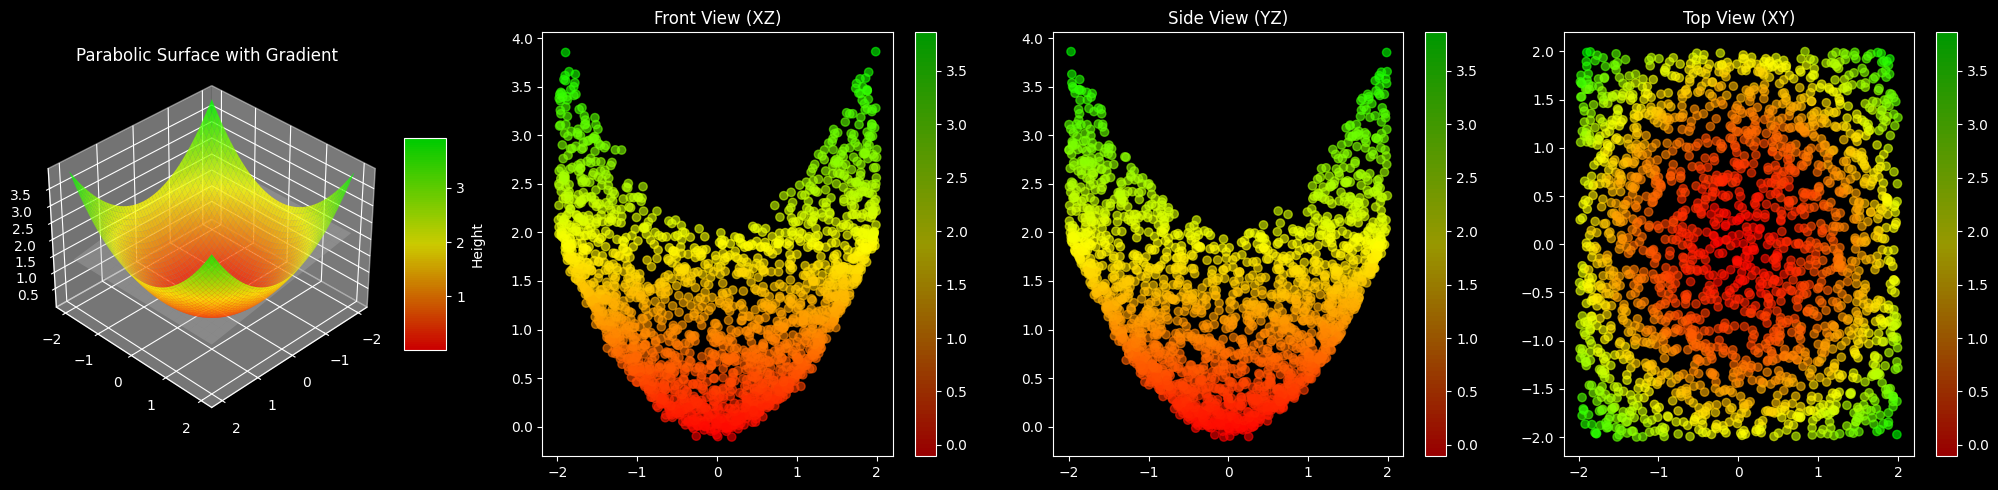


Parabola equation: z = 0.5(x² + y²)

Color gradient represents height (z-value):
Red = Low values
Yellow = Medium values
Green = High values


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import LinearSegmentedColormap

# Set random seed for reproducibility
np.random.seed(42)

# Generate parabolic data with more points for smoothness
def generate_parabolic_data(n_samples=2000):
    # Generate x and y coordinates in a grid-like pattern
    x = np.random.uniform(-2, 2, n_samples)
    y = np.random.uniform(-2, 2, n_samples)

    # Create parabolic z coordinate with less noise for smoothness
    z = 0.5 * (x**2 + y**2) + np.random.normal(0, 0.05, n_samples)

    # Combine coordinates
    points = np.column_stack((x, y, z))

    # Create labels: points above parabolic boundary
    labels = (z + 0.2*x > 1.8).astype(int)

    return points, labels

# Create custom colormap from red to green
colors = [(1, 0, 0), (1, 1, 0), (0, 1, 0)]  # Red -> Yellow -> Green
n_bins = 100
custom_cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

# Generate data
X, y = generate_parabolic_data()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit SVM
svm_clf = SVC(kernel='linear', class_weight={0: 1, 1: 1.2})
svm_clf.fit(X_scaled, y)

# Create figure with subplots
plt.style.use('dark_background')  # Dark background for better contrast
fig = plt.figure(figsize=(20, 5))

# Create smooth surface for main plot
x_surf = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y_surf = np.linspace(X[:,1].min(), X[:,1].max(), 100)
xx_surf, yy_surf = np.meshgrid(x_surf, y_surf)
zz_surf = 0.5 * (xx_surf**2 + yy_surf**2)

# 1. Main 3D Plot
ax1 = fig.add_subplot(141, projection='3d')

# Plot the smooth surface with color gradient
surf = ax1.plot_surface(xx_surf, yy_surf, zz_surf,
                       cmap=custom_cmap,
                       alpha=0.8,
                       linewidth=0,
                       antialiased=True)

# Get and plot the hyperplane
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

# Create grid for hyperplane
xx1, xx2 = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 20),
                       np.linspace(X[:,1].min(), X[:,1].max(), 20))

# Scale grid points
grid_points = np.column_stack((xx1.ravel(), xx2.ravel(),
                              np.zeros_like(xx1.ravel())))
grid_points_scaled = scaler.transform(grid_points)

# Calculate z coordinate of hyperplane
xx3_scaled = (-w[0] * grid_points_scaled[:,0]
              - w[1] * grid_points_scaled[:,1] - b) / w[2]
xx3 = scaler.inverse_transform(
    np.column_stack((grid_points_scaled[:,:2], xx3_scaled)))[:,2]
xx3 = xx3.reshape(xx1.shape)

# Plot hyperplane
ax1.plot_surface(xx1, xx2, xx3, alpha=0.3, color='white')

# Adjust viewing angle
ax1.view_init(elev=35, azim=45)
ax1.set_title('Parabolic Surface with Gradient', color='white')

# Add color bar
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5, label='Height')

# 2. Front view (XZ projection)
ax2 = fig.add_subplot(142)
points = plt.scatter(X[:,0], X[:,2], c=X[:,2], cmap=custom_cmap, alpha=0.6)
x_line = np.linspace(X[:,0].min(), X[:,0].max(), 100)
z_line = 0.5 * x_line**2
plt.colorbar(points, ax=ax2)
ax2.set_title('Front View (XZ)', color='white')

# 3. Side view (YZ projection)
ax3 = fig.add_subplot(143)
points = plt.scatter(X[:,1], X[:,2], c=X[:,2], cmap=custom_cmap, alpha=0.6)
y_line = np.linspace(X[:,1].min(), X[:,1].max(), 100)
z_line = 0.5 * y_line**2
plt.colorbar(points, ax=ax3)
ax3.set_title('Side View (YZ)', color='white')

# 4. Top view (XY projection)
ax4 = fig.add_subplot(144)
points = plt.scatter(X[:,0], X[:,1], c=X[:,2], cmap=custom_cmap, alpha=0.6)
plt.colorbar(points, ax=ax4)
ax4.set_title('Top View (XY)', color='white')

# Adjust layout and style
plt.tight_layout()

# Set background color for all subplots
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_facecolor('black')

plt.show()

print("\nParabola equation: z = 0.5(x² + y²)")
print("\nColor gradient represents height (z-value):")
print("Red = Low values")
print("Yellow = Medium values")
print("Green = High values")

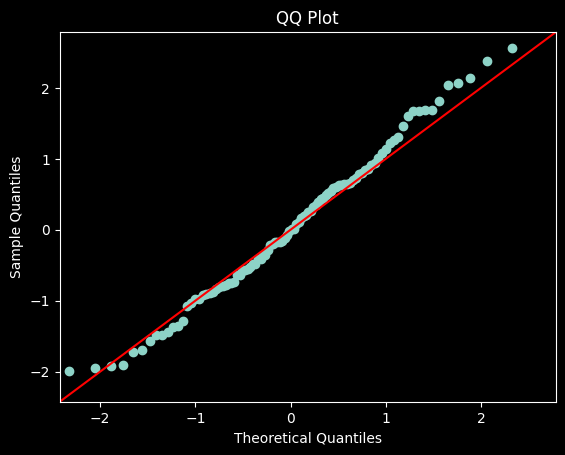

In [27]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate some data
data = np.random.normal(loc=0, scale=1, size=100)

# Create a QQ plot
sm.qqplot(data, line='45')  # '45' draws a line with a 45-degree angle
plt.title('QQ Plot')
plt.show()
